In [1]:
!nvidia-smi

Wed Aug 28 15:52:05 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P8              6W /   75W |     548MiB /   4096MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
print("Hello World")

Hello World


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#persamaan tridiagonal

def tridag(a, b, c, u, n, ng):
  temp = b[0]                     # pers. (4.1)
  u[0] = u[0]/temp                # pers. (4.2)
  for j in range(1, n):
    temp1 = b[j]
    b[j] = c/temp
    temp = temp1-a*b[j]           # pers. (4.5)
    u[j] = (u[j]-a*u[j-1])/temp   # pers. (4.6) untuk mendapatkan nilai baru
  for j in range(n-2, -1, -1):
    u[j] = u[j]-b[j+1]*u[j+1]     # pers. (4.7)
  return u

In [3]:
#persamaan metode filter

def filter1D(dx, vpot, psi, energy, n, k):
  dx2 = dx*dx
  a = -0.5/dx2                          # pers. (4.8)
  c = a
  odx2 = 1/dx2
  b = np.zeros(n)
  for k in range(0, 5):
    for i in range(0, n):
      b[i] = (odx2+vpot[i]-energy)      # pers. (4.9)
    global tridag
    psi = tridag(a, b, c, psi, n, n)
  fnorm = sum(psi*psi)*dx               # pers. (4.10)
  psi = psi/(fnorm**0.5)                # pers. (4.11)
  return psi

In [4]:
#persamaan hamiltonian

def hamiltonian(dx, vpot, psi, ng):
  dx2 = dx*dx
  a = -0.5/dx2
  c = a
  odx = 1/dx2
  u = np.zeros(ng)
  u[0] = ((odx+vpot[0])*psi[0]+c*psi[1])                # pers. (4.12)
  for i in range(1, ng-1):
    u[i] = (a*psi[i-1]+(odx+vpot[i])*psi[i]+c*psi[i+1]) # pers. (4.13)
  u[-1] = ((a*psi[-2])+(odx+vpot[-1])*psi[-1])          # pers. (4.14)
  psiu = psi*u
  energy_new = sum(psiu)*dx
  return energy_new

In [5]:
#persamaan eigenState

def eigenState(x, ngrid, vpot, initE, dx):
    if initE <=0:
        initE = initE + 1e-12

    x_tart = x[0]
    x_end = x[ngrid - 1]
    psi = np.zeros(ngrid)
    energy = initE  # Inisialisasi energy di sini
    if x_tart < 0:
        for i in range(0, ngrid):
            psi[i] = (np.sin(x[i]) + np.cos(x[i]))
    else:
        for i in range(0, ngrid):
            psi[i] = 1 + x[i] / x_end
    #psi=np.linspace(1,1,ngrid) + x/x[-1]
    error = 1e3
    loop = 1
    while error > 1e-12:
        nloop = 10
        if loop == 1:
            nloop = 10  # nloop
        global filter1D
        global hamiltonian
        psi = filter1D(dx, vpot, psi, energy, ngrid, nloop)
        energy_new = hamiltonian(dx, vpot, psi, ngrid)
        error = abs(energy_new - energy) / energy
        energy = energy_new
        loop = loop + 1

    output = [energy_new, psi]
    return output

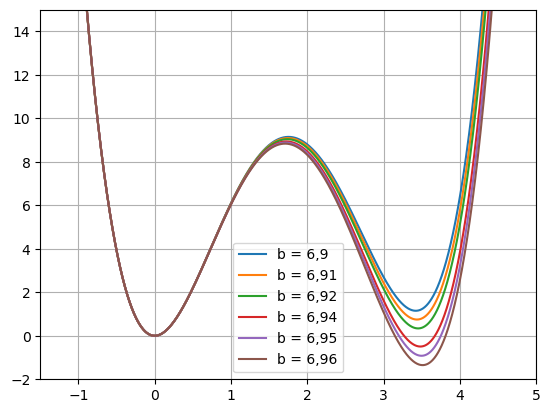

In [6]:
# inputan parameter potensial (cell yang diubah-ubah)
xmin = -10
xmax = 10
dx = 0.001
leb = xmax-xmin
ngrid = int(leb/dx)

# parameter tetap
a = 12
c = 1

# parameter berubah
b = [6.9, 6.91, 6.92, 6.94, 6.95, 6.96]

x = np.zeros(ngrid)
vpot0 = np.zeros(ngrid)
vpot1 = np.zeros(ngrid)
vpot2 = np.zeros(ngrid)
vpot3 = np.zeros(ngrid)
vpot4 = np.zeros(ngrid)
vpot5 = np.zeros(ngrid)

# Rumusan potensial
for i in range(0,ngrid):
  x[i] = xmin + ((i)*dx)
  vpot0[i] = a*x[i]**2 - b[0]*x[i]**3 + c*x[i]**4
  vpot1[i] = a*x[i]**2 - b[1]*x[i]**3 + c*x[i]**4
  vpot2[i] = a*x[i]**2 - b[2]*x[i]**3 + c*x[i]**4
  vpot3[i] = a*x[i]**2 - b[3]*x[i]**3 + c*x[i]**4
  vpot4[i] = a*x[i]**2 - b[4]*x[i]**3 + c*x[i]**4
  vpot5[i] = a*x[i]**2 - b[5]*x[i]**3 + c*x[i]**4

plt.plot(x,vpot0,label='b = 6,9')
plt.plot(x,vpot1,label='b = 6,91')
plt.plot(x,vpot2,label='b = 6,92')
plt.plot(x,vpot3,label='b = 6,94')
plt.plot(x,vpot4,label='b = 6,95')
plt.plot(x,vpot5,label='b = 6,96')
plt.legend()
plt.ylim(-2,15)
plt.xlim(-1.5,5)
plt.grid()
plt.show()

In [ ]:
ngrid

In [ ]:
# Fungsi gelombang untuk tingkat energi pertama. kalau mau ganti tingkat, initE nya diganti

#fungsi gelombang b = 22
initE = 1.4896915797564114
initE2= 5.878419706269748
initE3= 2.3573571939131734

output = eigenState(x, ngrid, vpot4, initE, dx)
output2 = eigenState(x, ngrid, vpot4, initE2, dx)
output3 = eigenState(x, ngrid, vpot4, initE3, dx)

energy_new = output[0]
energy_new2 = output2[0]
energy_new3 = output3[0]

psi = output[1]
psi2 = output2[1]
psi3 = output3[1]

fig,ax= plt.subplots()
plt.plot(x,psi, label = 'ϵ1',color= 'red')
plt.plot(x,psi2, label = 'ϵ2',linestyle= '--', color= 'green')
plt.plot(x,psi3, label = 'ϵ3', linestyle= (0,(3,1,1,1)),color= 'blue')

plt.xlim(-2, 5)
plt.ylim(-1.5, 1.5)
plt.title("fungsi gelombang b = 6,95")
ax.set_xlabel('x')
ax.set_ylabel('Ψ(x)')
plt.grid()
plt.legend()

In [ ]:
energy_new

In [ ]:
energy_new2

In [ ]:
energy_new3

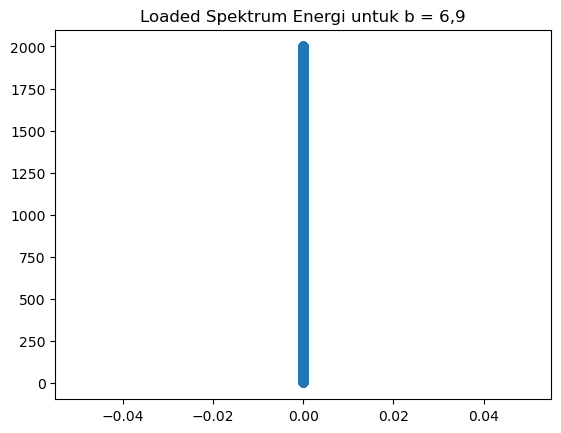

In [7]:
# Load data from the .dat file
data0 = np.loadtxt('data0final.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n0_loaded = data0[:, 0]
ener_new_arr_n0_loaded = data0[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n0_loaded, ener_new_arr_n0_loaded)
plt.title('Loaded Spektrum Energi untuk b = 6,9')
#plt.ylim(-10, 10)
plt.show()

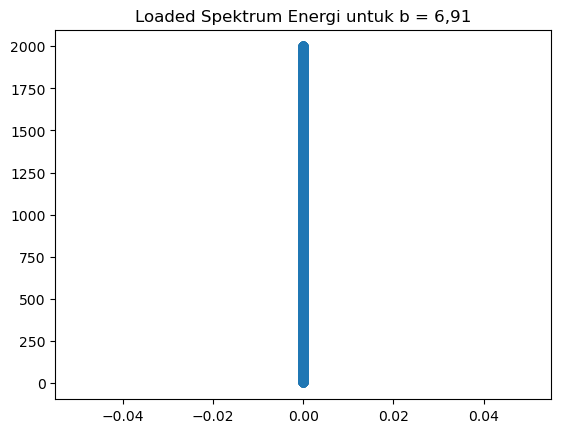

In [8]:
# Load data from the .dat file
data1 = np.loadtxt('data1final.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n1_loaded = data1[:, 0]
ener_new_arr_n1_loaded = data1[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n1_loaded, ener_new_arr_n1_loaded)
plt.title('Loaded Spektrum Energi untuk b = 6,91')
#plt.ylim(-10, 10)
plt.show()

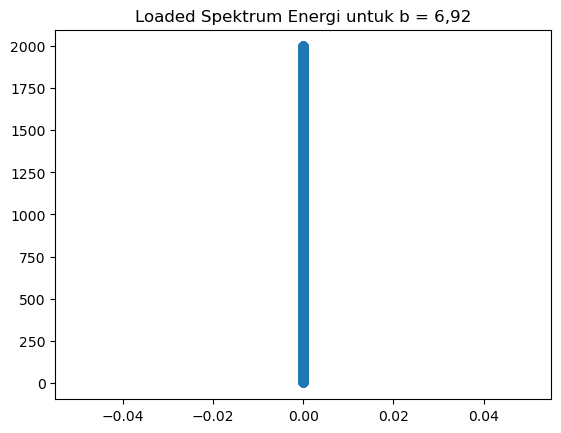

In [9]:
# Load data from the .dat file
data2 = np.loadtxt('data2final.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n2_loaded = data2[:, 0]
ener_new_arr_n2_loaded = data2[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n2_loaded, ener_new_arr_n2_loaded)
plt.title('Loaded Spektrum Energi untuk b = 6,92')
#plt.ylim(-10, 10)
plt.show()

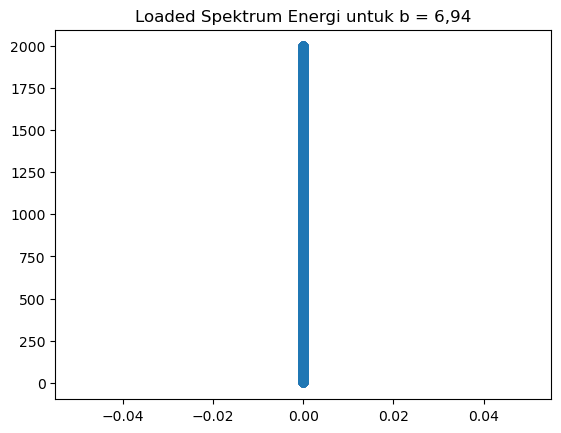

In [10]:
# Load data from the .dat file
data3 = np.loadtxt('data3final.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n3_loaded = data3[:, 0]
ener_new_arr_n3_loaded = data3[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n3_loaded, ener_new_arr_n3_loaded)
plt.title('Loaded Spektrum Energi untuk b = 6,94')
#plt.ylim(-10, 10)
plt.show()

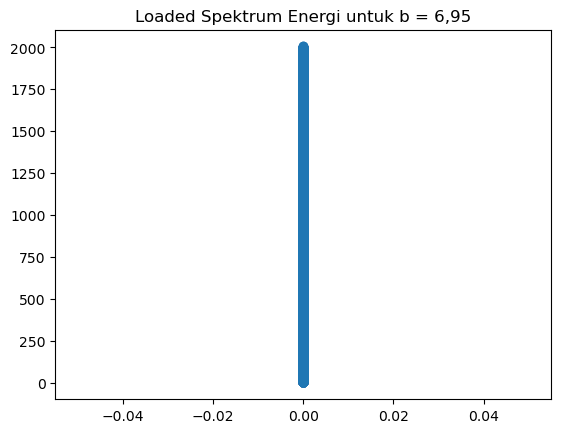

In [11]:
# Load data from the .dat file
data4 = np.loadtxt('data4final.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n4_loaded = data4[:, 0]
ener_new_arr_n4_loaded = data4[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n4_loaded, ener_new_arr_n4_loaded)
plt.title('Loaded Spektrum Energi untuk b = 6,95')
#plt.ylim(-10, 10)
plt.show()

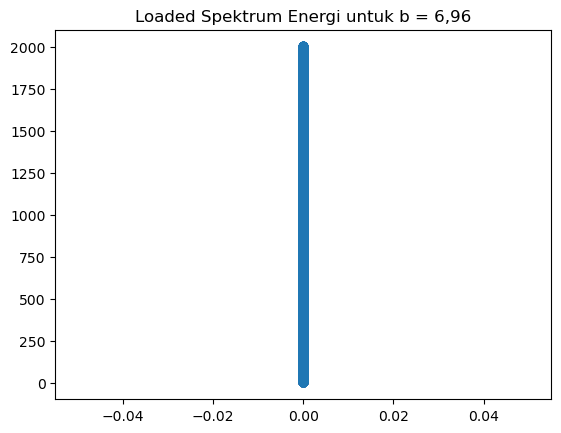

In [12]:
# Load data from the .dat file
data5 = np.loadtxt('data5final.dat', skiprows=1)

# Extracting columns from the loaded data
x_ener_n5_loaded = data5[:, 0]
ener_new_arr_n5_loaded = data5[:, 1].tolist()

# Plotting loaded data
plt.scatter(x_ener_n5_loaded, ener_new_arr_n5_loaded)
plt.title('Loaded Spektrum Energi untuk b = 6,96')
#plt.ylim(-10, 10)
plt.show()

In [13]:
ener_new_arr_n0_loaded.sort()
ener_new_arr_n1_loaded.sort()
ener_new_arr_n2_loaded.sort()
ener_new_arr_n3_loaded.sort()
ener_new_arr_n4_loaded.sort()
ener_new_arr_n5_loaded.sort()

In [14]:
ener_new_arr_n0_loaded

[2.3595577635927056,
 2.3595577635927056,
 2.359557763594144,
 2.359557763594144,
 2.359557763594144,
 2.359557763594144,
 2.359557763594144,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763595757,
 2.359557763596736,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627693986337,
 3.4412627694002897,
 3.4412627694002897,
 3.4412627694002897,
 3.4412627694002897,
 3.4412627694002897,
 3.4412627694002897,
 3.4412627694002897

In [15]:
ener_new_arr_n1_loaded

[2.3591197646397633,
 2.3591197646397633,
 2.3591197646397633,
 2.3591197646397633,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 2.3591197646409077,
 3.0626110678717837,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.06261106787279,
 3.062611067872912,
 3.062611067872912,
 3.062611067872912,
 6.61530

In [16]:
ener_new_arr_n2_loaded

[2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894708697,
 2.3586788894735777,
 2.678102087005595,
 2.6781020870057355,
 2.6781020870057386,
 2.6781020870062444,
 2.6781020870082783,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.6781020870092687,
 2.67810208700

In [17]:
ener_new_arr_n3_loaded

[1.891613819360247,
 1.8916138193606682,
 1.8916138193606682,
 1.8916138193606682,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.8916138193610088,
 1.891613819362763,
 1.8916138193631469,
 1.8916138193631469,
 1.8916138193631469,
 1.8916138193642742,
 1.938190034321476,
 1.9421673435288402,
 1.9460734386852263,
 1.9498975027416943,
 1.9536317700678438,
 1.9572709860129696,
 1.9608119422992618,
 1.9642530828517861,
 1.9675941728620505,
 1.970836023224029,
 1.9739802625970388,
 1.9770291499935349,
 1.9799854213568386,
 1.982852164710082,
 1.985632718826545,
 1.9883305914918734,
 1.9909493938765932,
 1.9934927880758406,
 1.995964445513807,
 1.9983680141585087,
 2.3578020175924297,
 2.3578020175924297,
 2.3578020175924297,
 2.3578020175924297,
 2.3578020175924297,
 2.3578020175931167,

In [18]:
ener_new_arr_n4_loaded

[1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.4896915797564114,
 1.499450034883282,
 1.5017211643358348,
 1.5042250601498013,
 1.5069467863214436,
 1.509869637172079,
 1.5129758496450099,
 1.5162471918579448,
 1.5196654353925512,
 1.5232127230713957,
 1.5268718457911046,
 1.5306264422340468,
 1.5344611346016057,
 1.538361612418716,
 1.5423146748891567,
 1.5463082410563396,
 1.5503313352418737,
 1.554374054362625,
 1.5584275221451864,
 1.5624838345273009,
 1.566535999526555,
 2.3573571939131734,
 2.357357193916823,
 2.357357193916823,
 2.357357193916823,
 2.357357193916823,
 2.357357193916823,
 2.357357193916823,
 2.357357193916823,
 2.3

In [19]:
ener_new_arr_n5_loaded

[1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641954732,
 1.0820075641971327,
 1.0827399339288817,
 1.0831159254136675,
 1.0836094410743689,
 1.084235021450817,
 1.0850051891989496,
 1.0859302287957673,
 1.087018103464137,
 1.088274479996014,
 1.0897028335077512,
 1.091304607567502,
 1.0930794094605114,
 1.0950252242446772,
 1.0971386351531358,
 1.0994150411438615,
 1.101848865067245,
 1.1044337480073763,
 1.107162727365021,
 1.1100283969866263,
 1.1130230492759183,
 1.1161387992717888,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.356911430416605,
 2.35691

In [20]:
nilai_energi_n0 = []
nilai_energi_n0.append(ener_new_arr_n0_loaded[0])
for j in range(1,len(ener_new_arr_n0_loaded)):
  selisih = (ener_new_arr_n0_loaded[j] - ener_new_arr_n0_loaded[j-1])
  if selisih > 0.5:
    nilai_energi_n0.append(ener_new_arr_n0_loaded[j])

nilai_energi_n1 = []
nilai_energi_n1.append(ener_new_arr_n1_loaded[0])
for j in range(1,len(ener_new_arr_n1_loaded)):
  selisih = (ener_new_arr_n1_loaded[j] - ener_new_arr_n1_loaded[j-1])
  if selisih > 0.5:
    nilai_energi_n1.append(ener_new_arr_n1_loaded[j])

nilai_energi_n2 = []
nilai_energi_n2.append(ener_new_arr_n2_loaded[0])
for j in range(1,len(ener_new_arr_n2_loaded)):
  selisih = (ener_new_arr_n2_loaded[j] - ener_new_arr_n2_loaded[j-1])
  if selisih > 0.2:
    nilai_energi_n2.append(ener_new_arr_n2_loaded[j])

nilai_energi_n3 = []
nilai_energi_n3.append(ener_new_arr_n3_loaded[0])
for j in range(1,len(ener_new_arr_n3_loaded)):
  selisih = (ener_new_arr_n3_loaded[j] - ener_new_arr_n3_loaded[j-1])
  if selisih > 0.3:
    nilai_energi_n3.append(ener_new_arr_n3_loaded[j])

nilai_energi_n4 = []
nilai_energi_n4.append(ener_new_arr_n4_loaded[0])
for j in range(1,len(ener_new_arr_n4_loaded)):
  selisih = (ener_new_arr_n4_loaded[j] - ener_new_arr_n4_loaded[j-1])
  if selisih > 0.1:
    nilai_energi_n4.append(ener_new_arr_n4_loaded[j])

nilai_energi_n5 = []
nilai_energi_n5.append(ener_new_arr_n5_loaded[0])
for j in range(1,len(ener_new_arr_n5_loaded)):
  selisih = (ener_new_arr_n5_loaded[j] - ener_new_arr_n5_loaded[j-1])
  if selisih > 0.1:
    nilai_energi_n5.append(ener_new_arr_n5_loaded[j])

In [21]:
nilai_energi_n0

[2.3595577635927056,
 3.4412627693986337,
 6.622776432070912,
 7.514416170035143,
 9.706154890653277,
 11.173963078889704,
 13.351416323570335,
 15.713020047109312,
 18.31767364677467,
 21.116284060880314,
 24.091457907362265,
 27.22761042483176,
 30.51265637569824,
 33.9365928647621,
 37.490976042518284,
 41.16854553596889,
 44.96297140177673,
 48.8686723951746,
 52.880681256050515,
 56.99454205831055,
 61.2062302484936,
 65.51208920721147,
 69.90877913440548,
 74.39323531383414,
 78.96263363987393,
 83.61436185212833,
 88.34599531519804,
 93.15527645989573,
 98.04009720462336,
 102.99848382505222,
 108.02858385212849,
 113.12865466336558,
 118.29705349767987,
 123.53222867469871,
 128.8327118393326,
 134.19711108378354,
 139.6241048244164,
 145.11243633114253,
 150.66090882332816,
 156.2683810596901,
 161.9337633606064,
 167.65601401033038,
 173.43413599420327,
 179.26717403218908,
 185.15421187538274,
 191.0943698365706,
 197.08680252970842,
 203.13069679637195,
 209.22526979999375,

In [22]:
nilai_energi_n1

[2.3591197646397633,
 3.0626110678717837,
 6.615303633253522,
 7.209793141877183,
 9.615345786000091,
 10.994522294074802,
 13.18427813502313,
 15.528789076279569,
 18.123773531163835,
 20.912660691166415,
 23.87880898786714,
 27.006344606530988,
 30.2831090580723,
 33.69903884238322,
 37.2456491356795,
 40.91564918112643,
 44.7026857142991,
 48.60115899424016,
 52.60608671110331,
 56.713000434970006,
 60.917865044057145,
 65.21701485820672,
 69.60710221538889,
 74.08505550772612,
 78.64804453546893,
 83.29345160838002,
 88.0188472209487,
 92.82196941035986,
 97.70070611069576,
 102.65307996771026,
 107.67723519152987,
 112.77142611014119,
 117.93400715245832,
 123.16342404070865,
 128.45820601197678,
 133.81695892045877,
 139.23835909725153,
 144.7211478648709,
 150.2641266201778,
 155.86615241287996,
 161.5261339577873,
 167.24302802813824,
 173.01583618490258,
 178.84360180326408,
 184.72540736281857,
 190.66037197247476,
 196.64764910483265,
 202.6864245180451,
 208.77591434587006,

In [23]:
nilai_energi_n2

[2.3586788894708697,
 2.678102087005595,
 6.6020151201148884,
 6.901583843661152,
 9.51223342855878,
 10.818314771692165,
 13.01620290633846,
 15.343913330028434,
 17.929031549170688,
 20.708110645554473,
 23.665169095994532,
 26.7840399729691,
 30.052485591707416,
 33.46037855745081,
 36.999190984199565,
 40.66160034881058,
 44.44122911998064,
 48.332458394946926,
 52.33029033467218,
 56.4302436531181,
 60.62827239676294,
 64.92070162469768,
 69.30417565900073,
 73.7756158802369,
 78.33218590007642,
 82.97126252324489,
 87.69041131373216,
 92.48736586617883,
 97.36001009038544,
 102.30636296933059,
 107.32456536508307,
 112.4128685334109,
 117.56962407419294,
 122.7932750961761,
 128.0823484149956,
 133.43544763522186,
 138.85124699272015,
 144.32848585403,
 149.86596378608894,
 155.46253612314263,
 161.1171099688131,
 166.82864058039087,
 172.59612809013865,
 178.41861452462572,
 184.29518108855248,
 190.22494568393367,
 196.20706063932118,
 202.24071062701617,
 208.32511074893833,
 

In [24]:
nilai_energi_n3

[1.891613819360247,
 2.3578020175924297,
 6.214713963594962,
 6.619755802238265,
 9.252926860801624,
 10.488841126296068,
 12.67551714695482,
 14.97266842059085,
 17.537046304776677,
 20.296288832096028,
 23.23495503410976,
 26.33634402051909,
 29.588032566399313,
 32.97975582995628,
 36.50289300478716,
 40.150053603471434,
 43.91480851828102,
 47.79149837920392,
 51.775092742479515,
 55.86108347184631,
 60.04540209821751,
 64.3243545113475,
 68.69456850225687,
 73.1529510388696,
 77.69665304840288,
 82.32304008067798,
 87.02966764177079,
 91.81426028150818,
 96.67469373056292,
 101.60897953881894,
 106.6152517830707,
 111.69175550022855,
 116.83683656959548,
 122.04893282021429,
 127.32656618000239,
 132.66833571605287,
 138.07291144096922,
 143.53902878108323,
 149.06548361901594,
 154.65112783684245,
 160.29486529722988,
 165.99564820931448,
 171.7524738336142,
 177.56438148683444,
 183.43044981268474,
 189.34979428940514,
 195.3215649485464,
 201.3449442827517,
 207.4191453230867,


In [25]:
nilai_energi_n4

[1.4896915797564114,
 2.3573571939131734,
 5.878419706269748,
 6.609158772245626,
 9.08966192855567,
 10.34148175918966,
 12.50200729607551,
 14.786543664992093,
 17.339812429030626,
 20.089048068454556,
 23.018401008399678,
 26.110968355143942,
 29.3542148287062,
 32.737802258731406,
 36.25305969017188,
 39.89256029234871,
 43.649847541950436,
 47.51924068797725,
 51.4956921555299,
 55.57467977256241,
 59.75212335435245,
 64.0243188574399,
 68.38788553835897,
 72.8397229486155,
 77.37697550729128,
 81.99700300438921,
 86.69735581046042,
 91.47575386640203,
 96.33006874251254,
 101.25830821374907,
 106.25860291582457,
 111.3291947357376,
 116.46842665851467,
 121.67473384457875,
 126.94663575358496,
 132.28272916301594,
 137.68168195595152,
 143.1422275731862,
 148.66316004181976,
 154.24332950621016,
 159.8816381984062,
 165.5770367945548,
 171.3285211114811,
 177.1351291040311,
 182.99593812928396,
 188.9100624481384,
 194.8766509387786,
 200.89488499964477,
 206.96397662247037,
 213

In [26]:
nilai_energi_n5

[1.0820075641954732,
 2.356911430416605,
 5.531125835872599,
 6.601695723919763,
 8.901506354894087,
 10.207497489745258,
 12.325835907810658,
 14.600247299919491,
 17.141757423731324,
 19.880942447051442,
 22.8008963370996,
 25.884585191268645,
 29.119344593903183,
 32.494760174853766,
 36.002108163645026,
 39.633923712820675,
 43.38372172552242,
 47.245799252970286,
 51.21509099846221,
 55.28706031844812,
 59.4576149855236,
 63.72304077375414,
 68.07994821263149,
 72.52522928668577,
 77.0560217878083,
 81.66967965112555,
 86.36374803505386,
 91.1359422092915,
 95.98412953275954,
 100.90631396341277,
 105.90062266091714,
 110.9652943331516,
 116.09866904626672,
 121.29917927130504,
 126.56534198196861,
 131.895751651037,
 137.28907401909436,
 142.74404053020837,
 148.25944334627076,
 153.83413086548978,
 159.46700368192128,
 165.15701093227693,
 170.90314698398296,
 176.70444842501954,
 182.55999132136952,
 188.4688887126339,
 194.43028832008096,
 200.44337044479855,
 206.507346036324

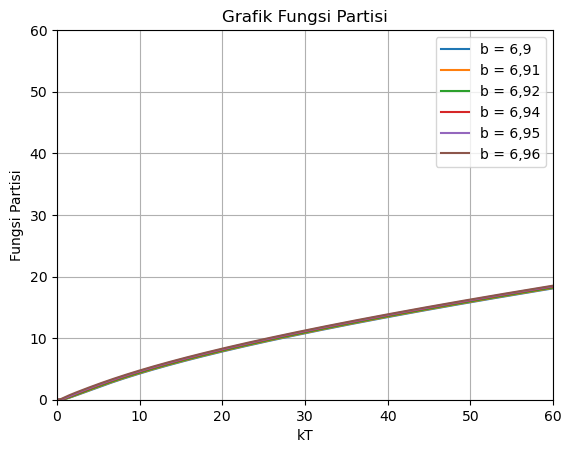

In [27]:
# Inisiasi Nilai kT
kT = np.arange(0.01,60,0.01)

# Perhitungan Fungsi Partisi n = 0
z_n0 = np.zeros(len(nilai_energi_n0))
z1_n0 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n0)):
    z_n0[i] = (np.exp(-(nilai_energi_n0[i]/kT[j])))
  z_total_n0 = np.sum(z_n0)
  z1_n0.append(z_total_n0)

# Perhitungan Fungsi Partisi n = 1
z_n1 = np.zeros(len(nilai_energi_n1))
z1_n1 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n1)):
    z_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
  z_total_n1 = np.sum(z_n1)
  z1_n1.append(z_total_n1)

# Perhitungan Fungsi Partisi n = 2
z_n2 = np.zeros(len(nilai_energi_n2))
z1_n2 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n2)):
    z_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
  z_total_n2 = np.sum(z_n2)
  z1_n2.append(z_total_n2)

# Perhitungan Fungsi Partisi n = 3
z_n3 = np.zeros(len(nilai_energi_n3))
z1_n3 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n3)):
    z_n3[i] = np.exp(-nilai_energi_n3[i]/kT[j])
  z_total_n3 = np.sum(z_n3)
  z1_n3.append(z_total_n3)

# Perhitungan Fungsi Partisi n = 4
z_n4 = np.zeros(len(nilai_energi_n4))
z1_n4 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n4)):
    z_n4[i] = np.exp(-nilai_energi_n4[i]/kT[j])
  z_total_n4 = np.sum(z_n4)
  z1_n4.append(z_total_n4)

# Perhitungan Fungsi Partisi n = 5
z_n5 = np.zeros(len(nilai_energi_n5))
z1_n5 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n5)):
    z_n5[i] = np.exp(-nilai_energi_n5[i]/kT[j])
  z_total_n5 = np.sum(z_n5)
  z1_n5.append(z_total_n5)

# Plot Fungsi Partisi n = 1 s.d 5
plt.plot(kT,z1_n0,label='b = 6,9')
plt.plot(kT,z1_n1,label='b = 6,91')
plt.plot(kT,z1_n2,label='b = 6,92')
plt.plot(kT,z1_n3,label='b = 6,94')
plt.plot(kT,z1_n4,label='b = 6,95')
plt.plot(kT,z1_n5,label='b = 6,96')
plt.xlabel("kT")
plt.ylabel("Fungsi Partisi")
plt.title("Grafik Fungsi Partisi")
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend()
plt.grid()
plt.show()

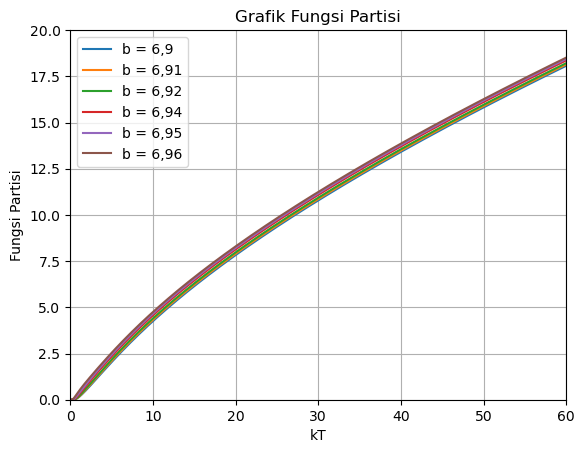

In [28]:
plt.plot(kT,z1_n0,label='b = 6,9')
plt.plot(kT,z1_n1,label='b = 6,91')
plt.plot(kT,z1_n2,label='b = 6,92')
plt.plot(kT,z1_n3,label='b = 6,94')
plt.plot(kT,z1_n4,label='b = 6,95')
plt.plot(kT,z1_n5,label='b = 6,96')
plt.xlabel("kT")
plt.ylabel("Fungsi Partisi")
plt.title("Grafik Fungsi Partisi")
plt.xlim(0,60)
plt.ylim(0,20)
plt.legend()
plt.grid()
plt.show()

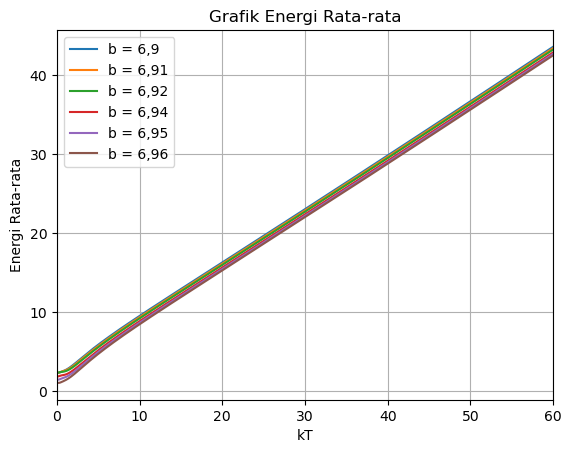

In [29]:
# Inisiasi Nilai kT
kT = np.arange(0.01,60,0.01)

# Perhitungan Energi Rata-rata n = 0
pm_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
U_n0 = []
for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n0)):
    pm_n0[i] = (nilai_energi_n0[i]*(np.exp(-(nilai_energi_n0[i]/kT[j]))))
    py_n0[i] = (np.exp(-(nilai_energi_n0[i]/kT[j])))
  Un_n0 = np.sum(pm_n0)/np.sum(py_n0)
  U_n0.append(Un_n0)

# Perhitungan Energi Rata-rata n = 1
pm_n1 = np.zeros(len(nilai_energi_n1))
py_n1 = np.zeros(len(nilai_energi_n1))
U_n1 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n1)):
    pm_n1[i] = (nilai_energi_n1[i]*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
    py_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
  Un_n1 = np.sum(pm_n1)/np.sum(py_n1)
  U_n1.append(Un_n1)

# Perhitungan Energi Rata-rata n = 2
pm_n2 = np.zeros(len(nilai_energi_n2))
py_n2 = np.zeros(len(nilai_energi_n2))
U_n2 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n2)):
    pm_n2[i] = (nilai_energi_n2[i]*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
    py_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
  Un_n2 = np.sum(pm_n2)/np.sum(py_n2)
  U_n2.append(Un_n2)

# Perhitungan Energi Rata-rata n = 3
pm_n3 = np.zeros(len(nilai_energi_n3))
py_n3 = np.zeros(len(nilai_energi_n3))
U_n3 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n3)):
    pm_n3[i] = (nilai_energi_n3[i]*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
    py_n3[i] = (np.exp(-(nilai_energi_n3[i]/kT[j])))
  Un_n3 = np.sum(pm_n3)/np.sum(py_n3)
  U_n3.append(Un_n3)

# Perhitungan Energi Rata-rata n = 4
pm_n4 = np.zeros(len(nilai_energi_n4))
py_n4 = np.zeros(len(nilai_energi_n4))
U_n4 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n4)):
    pm_n4[i] = (nilai_energi_n4[i]*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
    py_n4[i] = (np.exp(-(nilai_energi_n4[i]/kT[j])))
  Un_n4 = np.sum(pm_n4)/np.sum(py_n4)
  U_n4.append(Un_n4)

# Perhitungan Energi Rata-rata n = 5
pm_n5 = np.zeros(len(nilai_energi_n5))
py_n5 = np.zeros(len(nilai_energi_n5))
U_n5 = []

for j in range (len(kT)):
  for i in range (0,len(nilai_energi_n5)):
    pm_n5[i] = (nilai_energi_n5[i]*(np.exp(-(nilai_energi_n5[i]/kT[j]))))
    py_n5[i] = (np.exp(-(nilai_energi_n5[i]/kT[j])))
  Un_n5 = np.sum(pm_n5)/np.sum(py_n5)
  U_n5.append(Un_n5)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,U_n0,label='b = 6,9')
plt.plot(kT,U_n1,label='b = 6,91')
plt.plot(kT,U_n2,label='b = 6,92')
plt.plot(kT,U_n3,label='b = 6,94')
plt.plot(kT,U_n4,label='b = 6,95')
plt.plot(kT,U_n5,label='b = 6,96')
plt.xlabel("kT")
plt.ylabel("Energi Rata-rata")
plt.title("Grafik Energi Rata-rata")
plt.xlim(0,60)
#plt.ylim(-31,-15)
plt.legend()
plt.grid()
plt.show()

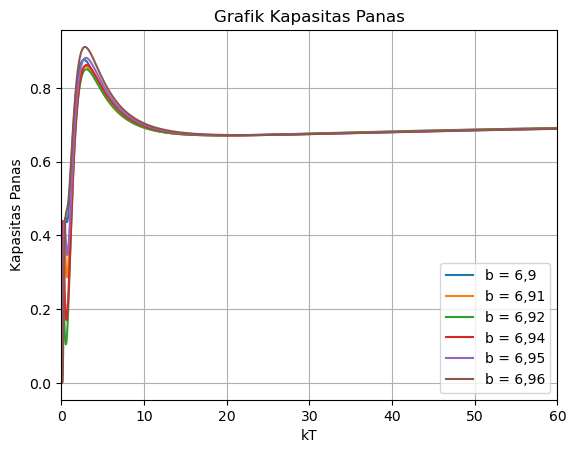

In [30]:
# Inisiasi Nilai kT
kT = np.arange(0.01,60,0.01)

# Perhitungan Kapasitas Panas n = 0
pm1_n0 = np.zeros(len(nilai_energi_n0))
py_n0 = np.zeros(len(nilai_energi_n0))
pm2_n0 = np.zeros(len(nilai_energi_n0))
Cv_n0 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n0)) :
    pm1_n0[i] = (nilai_energi_n0[i]**2)*(np.exp(-nilai_energi_n0[i]/kT[j]))
    py_n0[i] = np.exp(-nilai_energi_n0[i]/kT[j])
    pm2_n0[i] = nilai_energi_n0[i]*(np.exp(-nilai_energi_n0[i]/kT[j]))
  Cv_total_n0 = (1/(kT[j])**2)*((np.sum(pm1_n0)/np.sum(py_n0))-((np.sum(pm2_n0)/np.sum(py_n0))**2))
  Cv_n0.append(Cv_total_n0)

# Perhitungan Kapasitas Panas n = 1
pm1_n1 = np.zeros(len(nilai_energi_n1))
py_n1 = np.zeros(len(nilai_energi_n1))
pm2_n1 = np.zeros(len(nilai_energi_n1))
Cv_n1 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n1)) :
    pm1_n1[i] = (((nilai_energi_n1[i])**2)*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
    py_n1[i] = (np.exp(-(nilai_energi_n1[i]/kT[j])))
    pm2_n1[i] = (nilai_energi_n1[i]*(np.exp(-(nilai_energi_n1[i]/kT[j]))))
  Cv_total_n1 = ((1/kT[j])**2)*((np.sum(pm1_n1)/np.sum(py_n1))-((np.sum(pm2_n1)/np.sum(py_n1))**2))
  Cv_n1.append(Cv_total_n1)

# Perhitungan Kapasitas Panas n = 2
pm1_n2 = np.zeros(len(nilai_energi_n2))
py_n2 = np.zeros(len(nilai_energi_n2))
pm2_n2 = np.zeros(len(nilai_energi_n2))
Cv_n2 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n2)) :
    pm1_n2[i] = (((nilai_energi_n2[i])**2)*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
    py_n2[i] = (np.exp(-(nilai_energi_n2[i]/kT[j])))
    pm2_n2[i] = (nilai_energi_n2[i]*(np.exp(-(nilai_energi_n2[i]/kT[j]))))
  Cv_total_n2 = ((1/kT[j])**2)*((np.sum(pm1_n2)/np.sum(py_n2))-((np.sum(pm2_n2)/np.sum(py_n2))**2))
  Cv_n2.append(Cv_total_n2)

# Perhitungan Kapasitas Panas n = 3
pm1_n3 = np.zeros(len(nilai_energi_n3))
py_n3 = np.zeros(len(nilai_energi_n3))
pm2_n3 = np.zeros(len(nilai_energi_n3))
Cv_n3 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n3)) :
    pm1_n3[i] = (((nilai_energi_n3[i])**2)*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
    py_n3[i] = (np.exp(-(nilai_energi_n3[i]/kT[j])))
    pm2_n3[i] = (nilai_energi_n3[i]*(np.exp(-(nilai_energi_n3[i]/kT[j]))))
  Cv_total_n3 = ((1/kT[j])**2)*((np.sum(pm1_n3)/np.sum(py_n3))-((np.sum(pm2_n3)/np.sum(py_n3))**2))
  Cv_n3.append(Cv_total_n3)

# Perhitungan Kapasitas Panas n = 4
pm1_n4 = np.zeros(len(nilai_energi_n4))
py_n4 = np.zeros(len(nilai_energi_n4))
pm2_n4 = np.zeros(len(nilai_energi_n4))
Cv_n4 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n4)) :
    pm1_n4[i] = (((nilai_energi_n4[i])**2)*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
    py_n4[i] = (np.exp(-(nilai_energi_n4[i]/kT[j])))
    pm2_n4[i] = (nilai_energi_n4[i]*(np.exp(-(nilai_energi_n4[i]/kT[j]))))
  Cv_total_n4 = ((1/kT[j])**2)*((np.sum(pm1_n4)/np.sum(py_n4))-((np.sum(pm2_n4)/np.sum(py_n4))**2))
  Cv_n4.append(Cv_total_n4)

# Perhitungan Kapasitas Panas n = 5
pm1_n5 = np.zeros(len(nilai_energi_n5))
py_n5 = np.zeros(len(nilai_energi_n5))
pm2_n5 = np.zeros(len(nilai_energi_n5))
Cv_n5 = []
for j in range(len(kT)):
  for i in range (0,len(nilai_energi_n5)) :
    pm1_n5[i] = (nilai_energi_n5[i]**2)*(np.exp(-nilai_energi_n5[i]/kT[j]))
    py_n5[i] = np.exp(-nilai_energi_n5[i]/kT[j])
    pm2_n5[i] = nilai_energi_n5[i]*(np.exp(-nilai_energi_n5[i]/kT[j]))
  Cv_total_n5 = (1/(kT[j]**2))*((np.sum(pm1_n5)/np.sum(py_n5))-((np.sum(pm2_n5)/np.sum(py_n5))**2))
  Cv_n5.append(Cv_total_n5)

# Plot Energi Rata-rata n = 1 s.d 5
plt.plot(kT,Cv_n0,label='b = 6,9')
plt.plot(kT,Cv_n1,label='b = 6,91')
plt.plot(kT,Cv_n2,label='b = 6,92')
plt.plot(kT,Cv_n3,label='b = 6,94')
plt.plot(kT,Cv_n4,label='b = 6,95')
plt.plot(kT,Cv_n5,label='b = 6,96')
plt.xlabel("kT")
plt.ylabel("Kapasitas Panas")
plt.title("Grafik Kapasitas Panas")
plt.xlim(0,60)
plt.legend()
plt.grid()
plt.show()

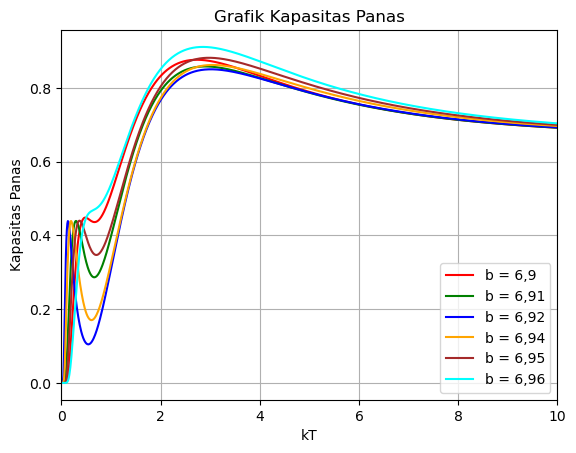

In [31]:
plt.plot(kT,Cv_n0,color='red',label='b = 6,9')
plt.plot(kT,Cv_n1,color='green',label='b = 6,91')
plt.plot(kT,Cv_n2,color='blue',label='b = 6,92')
plt.plot(kT,Cv_n3,color='orange',label='b = 6,94')
plt.plot(kT,Cv_n4,color='brown',label='b = 6,95')
plt.plot(kT,Cv_n5,color='cyan',label='b = 6,96')
plt.xlabel("kT")
plt.ylabel("Kapasitas Panas")
plt.title("Grafik Kapasitas Panas")
plt.xlim(0,10)
#plt.ylim(0.4,0.5)
plt.legend()
plt.grid()
plt.show()

b = 6.9: kT pada puncak kapasitas panas rendah = 0.48, kapasitas panas maksimum = 0.45
b = 6.91: kT pada puncak kapasitas panas rendah = 0.29, kapasitas panas maksimum = 0.44
b = 6.92: kT pada puncak kapasitas panas rendah = 0.13, kapasitas panas maksimum = 0.44
b = 6.94: kT pada puncak kapasitas panas rendah = 0.19, kapasitas panas maksimum = 0.44
b = 6.95: kT pada puncak kapasitas panas rendah = 0.36, kapasitas panas maksimum = 0.44
b = 6.96: kT pada puncak kapasitas panas rendah = 0.59, kapasitas panas maksimum = 0.46


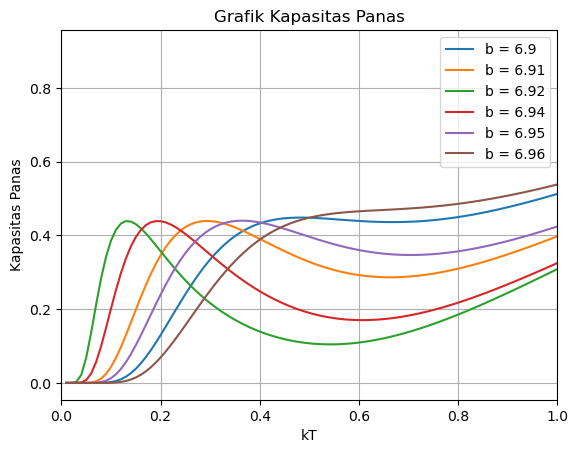

In [32]:
# untuk mencari nilai kT yang terjadi puncak pada grafik kapasitas panas

# Misalkan ini adalah data kapasitas panas untuk beberapa nilai b
#kT = np.linspace(0, 5, 100)  # Rentang kT dari 0 hingga 5 (ganti dengan data aktual dari grafik Anda)
heat_capacities = {
    "b = 6.9": Cv_n0,  # Ganti ini dengan data aktual
    "b = 6.91": Cv_n1, # Data kapasitas panas untuk setiap b
    "b = 6.92": Cv_n2,
    "b = 6.94": Cv_n3,
    "b = 6.95": Cv_n4,
    "b = 6.96": Cv_n5
}

# Menyimpan puncak kT untuk setiap kurva di rentang kT < 0.6
peak_kT_values = {}

# Batasan indeks untuk kT < 0.6
cutoff_index = np.where(kT < 0.6)[0][-1]

for label, capacity in heat_capacities.items():
    # Memotong data kapasitas panas untuk rentang kT < 0.6
    low_kT_capacity = capacity[:cutoff_index + 1]
    low_kT = kT[:cutoff_index + 1]
    
    # Mencari indeks nilai maksimum kapasitas panas pada rentang terbatas
    peak_index = np.argmax(low_kT_capacity)
    peak_kT = low_kT[peak_index]  # Nilai kT pada puncak di rentang kT rendah
    peak_capacity = low_kT_capacity[peak_index]  # Nilai kapasitas panas maksimum di rentang tersebut
    
    # Menyimpan nilai puncak kT dan kapasitas panas
    peak_kT_values[label] = peak_kT
    print(f"{label}: kT pada puncak kapasitas panas rendah = {peak_kT:.2f}, kapasitas panas maksimum = {peak_capacity:.2f}")

# Plot grafik kapasitas panas untuk memvisualisasikan
plt.figure()
for label, capacity in heat_capacities.items():
    plt.plot(kT, capacity, label=label)
    
plt.xlabel("kT")
plt.ylabel("Kapasitas Panas")
plt.title("Grafik Kapasitas Panas")
plt.xlim(0,1)
#plt.ylim(0.4,0.5)
plt.legend()
plt.grid()
plt.show()

In [33]:
# dugaan nilai lebar pemisahan energi dengan pendekatan anomali schottky
T = [0.48, 0.29, 0.13, 0.19, 0.36, 0.59]

deltaE0 = T[0]/0.417
deltaE1 = T[1]/0.417
deltaE2 = T[2]/0.417
deltaE3 = T[3]/0.417
deltaE4 = T[4]/0.417
deltaE5 = T[5]/0.417

print("Dugaan nilai lebar pemisahan energi b = 6,9 = ", deltaE0)
print("Dugaan nilai lebar pemisahan energi b = 6,91 = ", deltaE1)
print("Dugaan nilai lebar pemisahan energi b = 6,92 = ", deltaE2)
print("Dugaan nilai lebar pemisahan energi b = 6,94 = ", deltaE3)
print("Dugaan nilai lebar pemisahan energi b = 6,95 = ", deltaE4)
print("Dugaan nilai lebar pemisahan energi b = 6,96 = ", deltaE5)

Dugaan nilai lebar pemisahan energi b = 6,9 =  1.1510791366906474
Dugaan nilai lebar pemisahan energi b = 6,91 =  0.6954436450839329
Dugaan nilai lebar pemisahan energi b = 6,92 =  0.3117505995203837
Dugaan nilai lebar pemisahan energi b = 6,94 =  0.4556354916067146
Dugaan nilai lebar pemisahan energi b = 6,95 =  0.8633093525179856
Dugaan nilai lebar pemisahan energi b = 6,96 =  1.4148681055155876


In [34]:
# bandingan dengan nilai yang sebenarnya
b0 = [2.3595577635927056, 3.4412627693986337]
b1 = [2.3591197646397633, 3.0626110678717837]
b2 = [2.3586788894708697, 2.678102087005595]
b3 = [1.891613819360247, 2.3578020175924297]
b4 = [1.4896915797564114, 2.3573571939131734]
b5 = [1.0820075641954732, 2.356911430416605]

print("Selisih nilai E0 dan E1, b = 6,9 = ", b0[1] - b0[0])
print("Selisih nilai E0 dan E1, b = 6,91 = ", b1[1] - b1[0])
print("Selisih nilai E0 dan E1, b = 6,92 = ", b2[1] - b2[0])
print("Selisih nilai E0 dan E1, b = 6,94 = ", b3[1] - b3[0])
print("Selisih nilai E0 dan E1, b = 6,95 = ", b4[1] - b4[0])
print("Selisih nilai E0 dan E1, b = 6,96 = ", b5[1] - b5[0])

Selisih nilai E0 dan E1, b = 6,9 =  1.081705005805928
Selisih nilai E0 dan E1, b = 6,91 =  0.7034913032320205
Selisih nilai E0 dan E1, b = 6,92 =  0.3194231975347255
Selisih nilai E0 dan E1, b = 6,94 =  0.4661881982321827
Selisih nilai E0 dan E1, b = 6,95 =  0.867665614156762
Selisih nilai E0 dan E1, b = 6,96 =  1.2749038662211316


In [36]:
#import math

eror0 = np.abs((1.081705005805928 - deltaE0)/1.081705005805928)
eror1 = np.abs((0.7034913032320205 - deltaE1)/0.7034913032320205)
eror2 = np.abs((0.3194231975347255 - deltaE2)/0.3194231975347255)
eror3 = np.abs((0.4661881982321827 - deltaE3)/0.4661881982321827)
eror4 = np.abs((0.867665614156762 - deltaE4)/0.867665614156762)
eror5 = np.abs((1.2749038662211316 - deltaE5)/1.2749038662211316)

print("Error Relatif b = 6,9 : ", eror0, "%")
print("Error Relatif b = 6,91 : ", eror1, "%")
print("Error Relatif b = 6,92 : ", eror2, "%")
print("Error Relatif b = 6,94 : ", eror3, "%")
print("Error Relatif b = 6,95 : ", eror4, "%")
print("Error Relatif b = 6,96 : ", eror5, "%")

Error Relatif b = 6,9 :  0.06413405735608285 %
Error Relatif b = 6,91 :  0.011439598629172236 %
Error Relatif b = 6,92 :  0.024020165327872496 %
Error Relatif b = 6,94 :  0.0226361513772435 %
Error Relatif b = 6,95 :  0.005020668754990443 %
Error Relatif b = 6,96 :  0.10978415157631914 %


In [80]:
# Saving data to a .dat file
data_to_save0 = np.column_stack((x_ener_n0, ener_new_arr_n0))
np.savetxt('data0.dat', data_to_save0, header='x_ener_n0  ener_new_arr_n0', comments='')

In [ ]:
# Saving data to a .dat file
data_to_save1 = np.column_stack((x_ener_n1, ener_new_arr_n1))
np.savetxt('data1.dat', data_to_save1, header='x_ener_n1  ener_new_arr_n1', comments='')

In [8]:
# Saving data to a .dat file
data_to_save2 = np.column_stack((x_ener_n2, ener_new_arr_n2))
np.savetxt('data2.dat', data_to_save2, header='x_ener_n2  ener_new_arr_n2', comments='')

In [ ]:
# Saving data to a .dat file
data_to_save3 = np.column_stack((x_ener_n3, ener_new_arr_n3))
np.savetxt('data3.dat', data_to_save3, header='x_ener_n3  ener_new_arr_n3', comments='')

In [8]:
# Saving data to a .dat file
data_to_save4 = np.column_stack((x_ener_n4, ener_new_arr_n4))
np.savetxt('data4.dat', data_to_save4, header='x_ener_n4  ener_new_arr_n4', comments='')

In [ ]:
# Saving data to a .dat file
data_to_save5 = np.column_stack((x_ener_n5, ener_new_arr_n5))
np.savetxt('data5.dat', data_to_save5, header='x_ener_n5  ener_new_arr_n5', comments='')